In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import altair as alt
import warnings
warnings.filterwarnings('ignore')
import plotly as py

In [2]:
df=pd.read_csv(r"C:\Users\Nani\PycharmProjects\FORMULA1_beaut\F1Final.csv",encoding = "ISO-8859-1")

In [3]:
dfs=pd.read_csv(r"C:\Users\Nani\PycharmProjects\FORMULA1_beaut\F1speed.csv",encoding = "ISO-8859-1")

In [4]:
dfq=pd.read_csv(r"C:\Users\Nani\PycharmProjects\FORMULA1_beaut\F1qual.csv",encoding = "ISO-8859-1")

## DATA CLEANSING

In [5]:
df

,Position,Number,FirstName,LastName,Car,Laps,Time/Retired,Track,year
0,1,2,Nino,Farina,Alfa Romeo,70.0,2:13:23.600,Great Britain,1950
1,2,3,Luigi,Fagioli,Alfa Romeo,70.0,+2.600s,Great Britain,1950
2,3,4,Reg,Parnell,Alfa Romeo,70.0,+52.000s,Great Britain,1950
3,4,14,Yves Giraud,Cabantous,Talbot-Lago,68.0,+2 laps,Great Britain,1950
4,5,15,Louis,Rosier,Talbot-Lago,68.0,+2 laps,Great Britain,1950
...,...,...,...,...,...,...,...,...,...
22712,16,99,Antonio,Giovinazzi,Alfa Romeo Racing Ferrari,54.0,+1 lap,Abu Dhabi,2019
22713,17,63,George,Russell,Williams Mercedes,54.0,+1 lap,Abu Dhabi,2019
22714,18,10,Pierre,Gasly,Scuderia Toro Rosso Honda,53.0,+2 laps,Abu Dhabi,2019
22715,19,88,Robert,Kubica,Williams Mercedes,53.0,+2 laps,Abu Dhabi,2019


In [6]:
dfs

,Position,Number,FirstName,LastName,Car,Average Speed,Track,Year
0,1,8,Mika,Hakkinen,McLaren Mercedes,208.303,Australia,1998
1,2,7,David,Coulthard,McLaren Mercedes,206.708,Australia,1998
2,3,2,Heinz-Harald,Frentzen,Williams Mecachrome,204.061,Australia,1998
3,4,4,Eddie,Irvine,Ferrari,203.548,Australia,1998
4,5,9,Damon,Hill,Jordan Mugen Honda,202.671,Australia,1998
...,...,...,...,...,...,...,...,...
8225,16,27,Nico,Hulkenberg,Renault,193.605,Abu Dhabi,2019
8226,17,18,Lance,Stroll,Racing Point BWT Mercedes,193.507,Abu Dhabi,2019
8227,18,8,Romain,Grosjean,Haas Ferrari,192.873,Abu Dhabi,2019
8228,19,20,Kevin,Magnussen,Haas Ferrari,192.642,Abu Dhabi,2019


In [7]:
dfq

,Position,Number,FirstName,LastName,Car,Time,Track,year
0,1,2,Nino,Farina,Alfa Romeo,1:50.800,Great Britain,1950
1,1,34,Juan Manuel,Fangio,Alfa Romeo,1:50.200,Monaco,1950
2,1,98,Walt,Faulkner,Kurtis Kraft Offenhauser,1:06.992,Indianapolis 500,1950
3,1,14,Juan Manuel,Fangio,Alfa Romeo,2:42.100,Switzerland,1950
4,1,8,Nino,Farina,Alfa Romeo,4:37.000,Belgium,1950
...,...,...,...,...,...,...,...,...
15590,16,8,Romain,Grosjean,Haas Ferrari,1:38.051,Abu Dhabi,2019
15591,17,99,Antonio,Giovinazzi,Alfa Romeo Racing Ferrari,1:38.114,Abu Dhabi,2019
15592,18,7,Kimi,Räikkönen,Alfa Romeo Racing Ferrari,1:38.383,Abu Dhabi,2019
15593,19,63,George,Russell,Williams Mercedes,1:38.717,Abu Dhabi,2019


In [8]:
df=df.rename(columns={"Time/Retired":"Time"})

In [9]:
df.isnull().sum()

Position       0
Number         0
FirstName      0
LastName       0
Car           26
Laps         223
Time           8
Track          0
year           0
dtype: int64

In [10]:
    df["Car"].value_counts()

Ferrari             2179
Renault              747
McLaren Mercedes     699
Lotus Ford           578
Tyrrell Ford         572
                    ... 
Shannon Climax         1
EMW                    1
Euro Brun Judd         1
Connew Ford            1
Matra BRM              1
Name: Car, Length: 319, dtype: int64

In [11]:
df["Driver"]= df["FirstName"] + " " +  df["LastName"]

In [12]:
df.drop(["LastName","FirstName"],axis=1)

,Position,Number,Car,Laps,Time,Track,year,Driver
0,1,2,Alfa Romeo,70.0,2:13:23.600,Great Britain,1950,Nino Farina
1,2,3,Alfa Romeo,70.0,+2.600s,Great Britain,1950,Luigi Fagioli
2,3,4,Alfa Romeo,70.0,+52.000s,Great Britain,1950,Reg Parnell
3,4,14,Talbot-Lago,68.0,+2 laps,Great Britain,1950,Yves Giraud Cabantous
4,5,15,Talbot-Lago,68.0,+2 laps,Great Britain,1950,Louis Rosier
...,...,...,...,...,...,...,...,...
22712,16,99,Alfa Romeo Racing Ferrari,54.0,+1 lap,Abu Dhabi,2019,Antonio Giovinazzi
22713,17,63,Williams Mercedes,54.0,+1 lap,Abu Dhabi,2019,George Russell
22714,18,10,Scuderia Toro Rosso Honda,53.0,+2 laps,Abu Dhabi,2019,Pierre Gasly
22715,19,88,Williams Mercedes,53.0,+2 laps,Abu Dhabi,2019,Robert Kubica


### Sorting the table

In [13]:
df=df[["Position","Driver","Car","Time","Laps","Track","year"]]

In [14]:
df

,Position,Driver,Car,Time,Laps,Track,year
0,1,Nino Farina,Alfa Romeo,2:13:23.600,70.0,Great Britain,1950
1,2,Luigi Fagioli,Alfa Romeo,+2.600s,70.0,Great Britain,1950
2,3,Reg Parnell,Alfa Romeo,+52.000s,70.0,Great Britain,1950
3,4,Yves Giraud Cabantous,Talbot-Lago,+2 laps,68.0,Great Britain,1950
4,5,Louis Rosier,Talbot-Lago,+2 laps,68.0,Great Britain,1950
...,...,...,...,...,...,...,...
22712,16,Antonio Giovinazzi,Alfa Romeo Racing Ferrari,+1 lap,54.0,Abu Dhabi,2019
22713,17,George Russell,Williams Mercedes,+1 lap,54.0,Abu Dhabi,2019
22714,18,Pierre Gasly,Scuderia Toro Rosso Honda,+2 laps,53.0,Abu Dhabi,2019
22715,19,Robert Kubica,Williams Mercedes,+2 laps,53.0,Abu Dhabi,2019


In [15]:
pd.unique(df["Driver"])


array(['Nino Farina', 'Luigi Fagioli', 'Reg  Parnell',
       'Yves Giraud Cabantous', 'Louis  Rosier', 'Bob  Gerard',
       'Cuth  Harrison', 'Philippe  Etancelin', 'David  Hampshire',
       'Joe Fry', 'Brian Shawe-Taylor', 'Johnny Claes',
       'Juan Manuel Fangio', 'Joe Kelly', 'Prince Bira', 'David  Murray',
       'Geoff Crossley', 'Toulo de Graffenried', 'Louis  Chiron',
       'Eugene  Martin', 'Peter  Walker ', 'Tony Rolt', 'Leslie  Johnson',
       'Alberto Ascari', 'Raymond  Sommer', 'Luigi  Villoresi',
       'Jose Froilan Gonzalez', 'Robert  Manzon', 'Harry Schell',
       'Maurice  Trintignant', 'Franco  Rol', 'Johnnie  Parsons',
       'Bill Holland', 'Mauri  Rose', 'Cecil  Green', 'Joie  Chitwood',
       'Tony  Bettenhausen', 'Lee Wallard', 'Walt  Faulkner',
       'George Connor', 'Paul Russo', 'Pat Flaherty', 'Myron Fohr',
       'Duane Carter', 'Mack Hellings', 'Jack McGrath', 'Troy Ruttman',
       'Gene Hartley', 'Jimmy Davies', 'Johnny McDowell', 'Walt Brown',


In [16]:
### TO check unique values in Timings columns 

In [17]:
uni_time=df[df["Time"].str.contains("laps",na=False)]

In [18]:
uni_time["Time"].unique()

array(['+2 laps', '+3 laps', '+5 laps', '+6 laps', '+13 laps', '+8 laps',
       '+10 laps', '+11 laps', '+12 laps', '+15 laps', '+16 laps',
       '+7 laps', '+4 laps', '+20 laps', '+19 laps', '+22 laps',
       '+9 laps', '+18 laps', '+14 laps', '+17 laps', '+24 laps',
       '+23 laps', '+46 laps', '+30 laps', '+44 laps', '+28 laps',
       '+21 laps', '+25 laps', '+29 laps', '+45 laps', '+35 laps',
       '+27 laps', '+51 laps', '+43 laps', '+34 laps', '+38 laps',
       '+26 laps', '+56 laps', '+33 laps'], dtype=object)

In [19]:
win=df[df["Position"]=="1"]

In [20]:
win_10=win[win.groupby("Driver")["Driver"].transform("size")>5]

In [21]:
win_10["Laps"]=win_10["Laps"].fillna(win_10["Laps"].median())

In [22]:
win_10["Laps"].unique()

array([100.,  35.,  64.,  42.,  77.,  20.,  80.,  70.,  36.,  85.,  18.,
        90.,  97.,  65.,  87.,  61.,  22.,  66.,  96.,  50.,  98., 101.,
       105.,  75.,  24.,  15.,  53.,  60.,  62.,  72.,  55.,  32.,  86.,
        82., 110.,  78.,  40.,  76.,  28.,  48., 108.,  68.,  14.,  38.,
        84.,  79.,  12.,  95.,  54.,  59.,  52.,  56.,  73.,  47.,  63.,
        45.,  67.,  31.,  71.,  44.,  51.,  43.,  69.,  58.,  81.,  83.,
        57.,  49.])

[Text(0, 0, 'Juan Manuel Fangio'),
 Text(0, 0, 'Alberto Ascari'),
 Text(0, 0, 'Stirling Moss'),
 Text(0, 0, 'Tony Brooks'),
 Text(0, 0, 'Jack Brabham'),
 Text(0, 0, 'Graham Hill'),
 Text(0, 0, 'Jim Clark'),
 Text(0, 0, 'John Surtees'),
 Text(0, 0, 'Jackie Stewart'),
 Text(0, 0, 'Denny Hulme'),
 Text(0, 0, 'Jacky Ickx'),
 Text(0, 0, 'Jochen Rindt'),
 Text(0, 0, 'Emerson Fittipaldi'),
 Text(0, 0, 'Mario Andretti'),
 Text(0, 0, 'Ronnie Peterson'),
 Text(0, 0, 'Carlos Reutemann'),
 Text(0, 0, 'Niki Lauda'),
 Text(0, 0, 'Jody Scheckter'),
 Text(0, 0, 'James Hunt'),
 Text(0, 0, 'Jacques Laffite'),
 Text(0, 0, 'Alan  Jones'),
 Text(0, 0, 'Gilles Villeneuve'),
 Text(0, 0, 'Rene Arnoux'),
 Text(0, 0, 'Nelson Piquet'),
 Text(0, 0, 'Alain Prost'),
 Text(0, 0, 'Riccardo Patrese'),
 Text(0, 0, 'Ayrton Senna'),
 Text(0, 0, 'Nigel Mansell'),
 Text(0, 0, 'Gerhard Berger'),
 Text(0, 0, 'Michael Schumacher'),
 Text(0, 0, 'Damon Hill'),
 Text(0, 0, 'David Coulthard'),
 Text(0, 0, 'Jacques Villeneuve'),
 

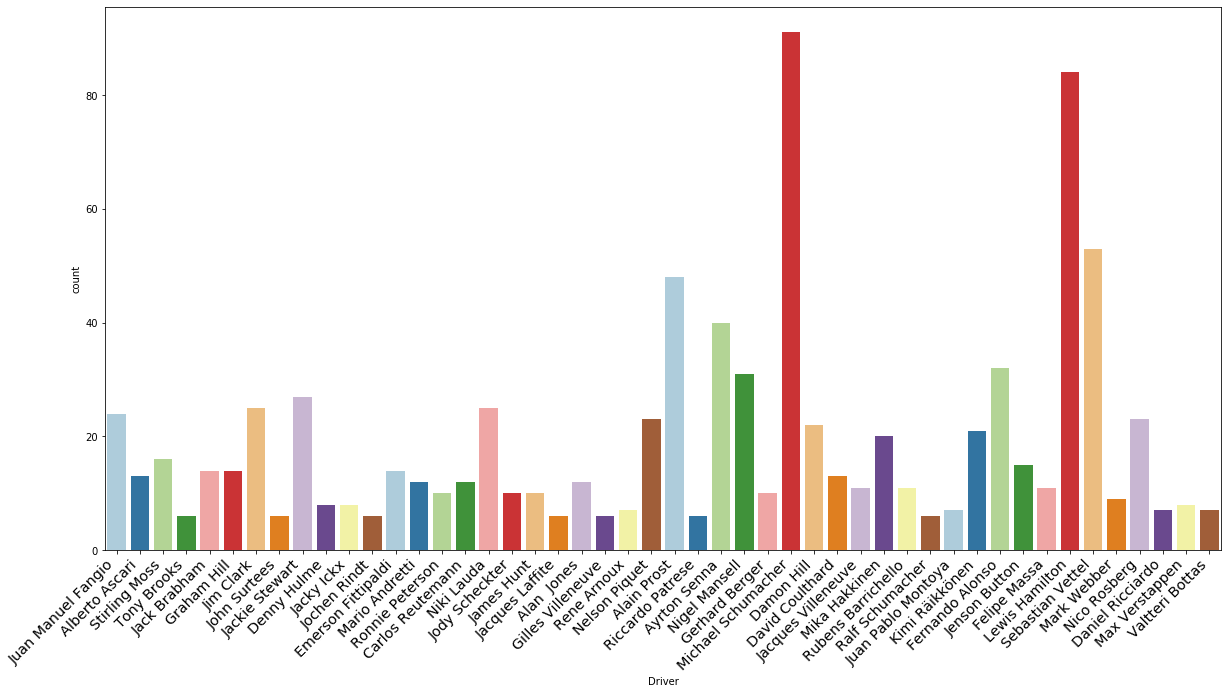

In [23]:

plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=win_10,palette="Paired",
    x=win_10["Driver"]
    
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')

[Text(0, 0, 'Alfa Romeo'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Vanwall'),
 Text(0, 0, 'Cooper Climax'),
 Text(0, 0, 'Lotus Climax'),
 Text(0, 0, 'BRM'),
 Text(0, 0, 'Brabham Repco'),
 Text(0, 0, 'Lotus BRM'),
 Text(0, 0, 'Cooper Maserati'),
 Text(0, 0, 'Lotus Ford'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Matra Ford'),
 Text(0, 0, 'McLaren Ford'),
 Text(0, 0, 'Brabham Ford'),
 Text(0, 0, 'March Ford'),
 Text(0, 0, 'Tyrrell Ford'),
 Text(0, 0, 'Hesketh Ford'),
 Text(0, 0, 'Wolf Ford'),
 Text(0, 0, 'Ligier Matra'),
 Text(0, 0, 'Shadow Ford'),
 Text(0, 0, 'Brabham Alfa Romeo'),
 Text(0, 0, 'Ligier Ford'),
 Text(0, 0, 'Williams Ford'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Brabham BMW'),
 Text(0, 0, 'McLaren TAG'),
 Text(0, 0, 'Lotus Renault'),
 Text(0, 0, 'Williams Honda'),
 Text(0, 0, 'Benetton BMW'),
 Text(0, 0, 'Lotus Honda'),
 Text(0, 0, 'McLaren Honda'),
 Text(0, 0, 'Williams Renault'),
 Text(0, 0, 'Benetton Ford'),
 Text(0, 0, 'Bene

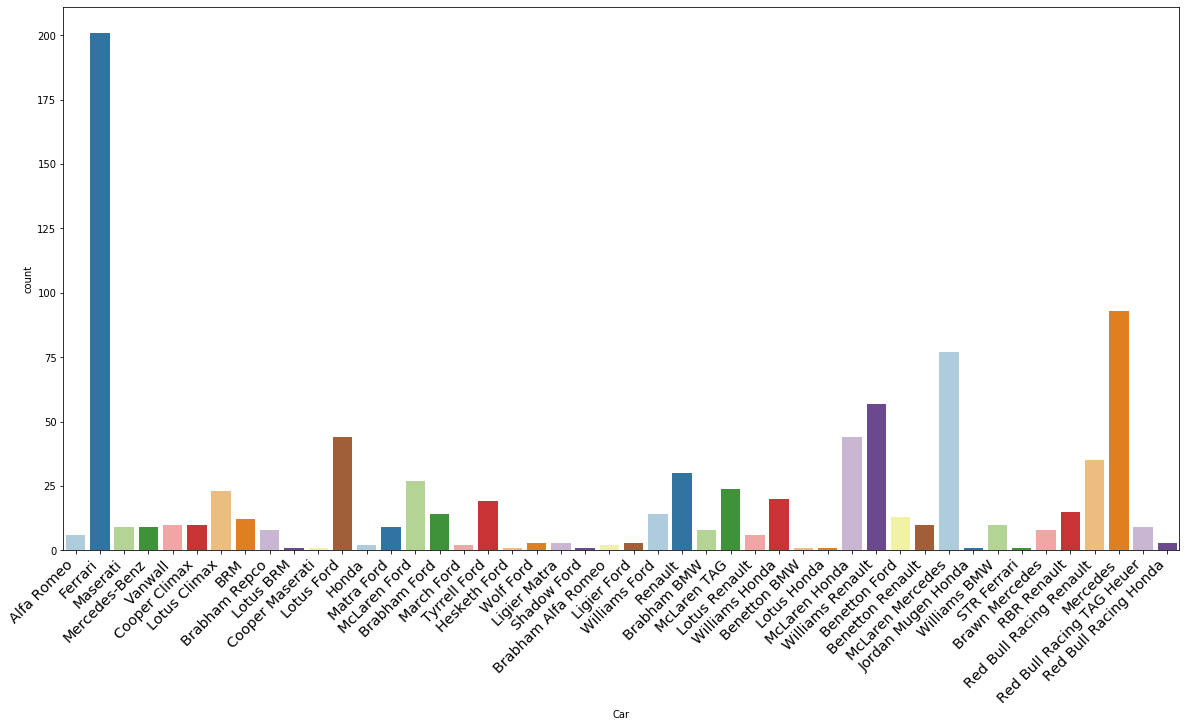

In [24]:
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=win_10,palette="Paired",
    x=win_10["Car"]
    
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')


In [25]:
win_10.reset_index(drop=True,inplace=True)

In [26]:
win_10.Laps.unique()

array([100.,  35.,  64.,  42.,  77.,  20.,  80.,  70.,  36.,  85.,  18.,
        90.,  97.,  65.,  87.,  61.,  22.,  66.,  96.,  50.,  98., 101.,
       105.,  75.,  24.,  15.,  53.,  60.,  62.,  72.,  55.,  32.,  86.,
        82., 110.,  78.,  40.,  76.,  28.,  48., 108.,  68.,  14.,  38.,
        84.,  79.,  12.,  95.,  54.,  59.,  52.,  56.,  73.,  47.,  63.,
        45.,  67.,  31.,  71.,  44.,  51.,  43.,  69.,  58.,  81.,  83.,
        57.,  49.])

[Text(0, 0, 'Juan Manuel Fangio'),
 Text(0, 0, 'Alberto Ascari'),
 Text(0, 0, 'Stirling Moss'),
 Text(0, 0, 'Tony Brooks'),
 Text(0, 0, 'Jack Brabham'),
 Text(0, 0, 'Graham Hill'),
 Text(0, 0, 'Jim Clark'),
 Text(0, 0, 'John Surtees'),
 Text(0, 0, 'Jackie Stewart'),
 Text(0, 0, 'Denny Hulme'),
 Text(0, 0, 'Jacky Ickx'),
 Text(0, 0, 'Jochen Rindt'),
 Text(0, 0, 'Emerson Fittipaldi'),
 Text(0, 0, 'Mario Andretti'),
 Text(0, 0, 'Ronnie Peterson'),
 Text(0, 0, 'Carlos Reutemann'),
 Text(0, 0, 'Niki Lauda'),
 Text(0, 0, 'Jody Scheckter'),
 Text(0, 0, 'James Hunt'),
 Text(0, 0, 'Jacques Laffite'),
 Text(0, 0, 'Alan  Jones'),
 Text(0, 0, 'Gilles Villeneuve'),
 Text(0, 0, 'Rene Arnoux'),
 Text(0, 0, 'Nelson Piquet'),
 Text(0, 0, 'Alain Prost'),
 Text(0, 0, 'Riccardo Patrese'),
 Text(0, 0, 'Ayrton Senna'),
 Text(0, 0, 'Nigel Mansell'),
 Text(0, 0, 'Gerhard Berger'),
 Text(0, 0, 'Michael Schumacher'),
 Text(0, 0, 'Damon Hill'),
 Text(0, 0, 'David Coulthard'),
 Text(0, 0, 'Jacques Villeneuve'),
 

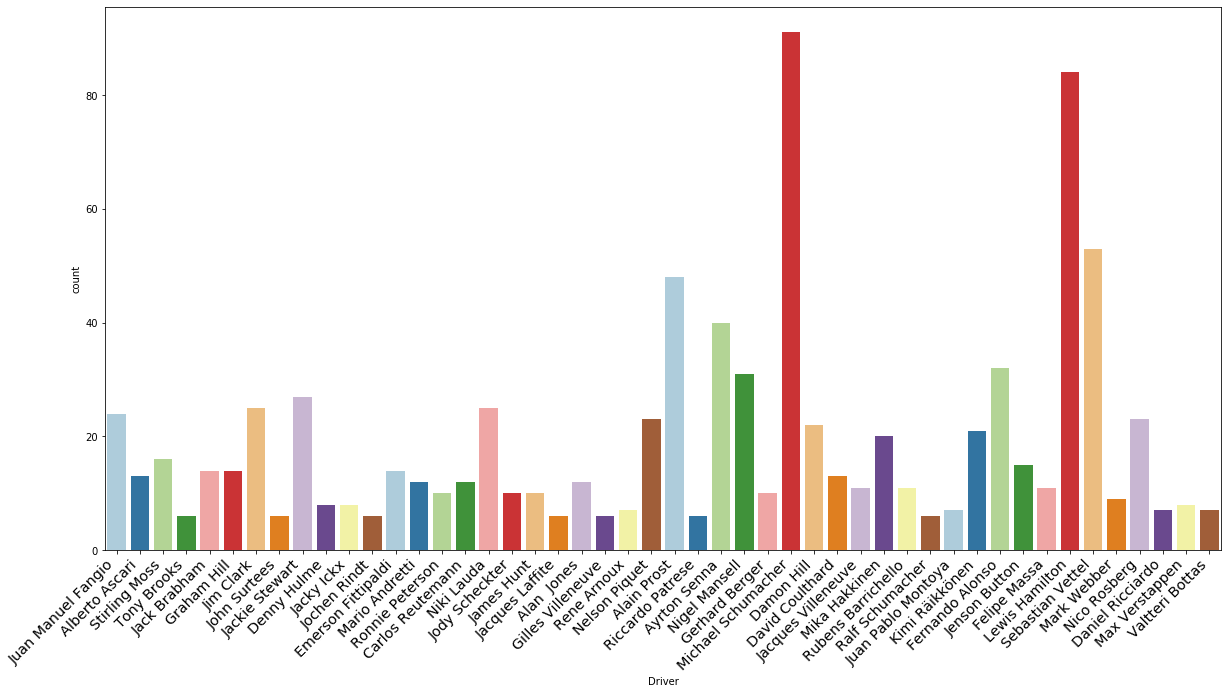

In [27]:
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=win_10,palette="Paired",
    x=win_10["Driver"]
    
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')

### Converting Time 

In [28]:
win_10["Time"]=win_10["Time"].apply(lambda x: x.split(".")[0])

In [29]:
# win_10["Time"]= "0"+ win_10["Time"].astype(str)

In [30]:
win_10

,Position,Driver,Car,Time,Laps,Track,year
0,1,Juan Manuel Fangio,Alfa Romeo,3:13:18,100.0,Monaco,1950
1,1,Juan Manuel Fangio,Alfa Romeo,2:47:26,35.0,Belgium,1950
2,1,Juan Manuel Fangio,Alfa Romeo,2:57:52,64.0,France,1950
3,1,Juan Manuel Fangio,Alfa Romeo,2:07:53,42.0,Switzerland,1951
4,1,Juan Manuel Fangio,Alfa Romeo,3:22:11,77.0,France,1951
...,...,...,...,...,...,...,...
895,1,Valtteri Bottas,Mercedes,1:21:46,52.0,Japan,2019
896,1,Lewis Hamilton,Mercedes,1:36:48,71.0,Mexico,2019
897,1,Valtteri Bottas,Mercedes,1:33:55,56.0,United States,2019
898,1,Max Verstappen,Red Bull Racing Honda,1:33:14,71.0,Brazil,2019


In [31]:
win_10

,Position,Driver,Car,Time,Laps,Track,year
0,1,Juan Manuel Fangio,Alfa Romeo,3:13:18,100.0,Monaco,1950
1,1,Juan Manuel Fangio,Alfa Romeo,2:47:26,35.0,Belgium,1950
2,1,Juan Manuel Fangio,Alfa Romeo,2:57:52,64.0,France,1950
3,1,Juan Manuel Fangio,Alfa Romeo,2:07:53,42.0,Switzerland,1951
4,1,Juan Manuel Fangio,Alfa Romeo,3:22:11,77.0,France,1951
...,...,...,...,...,...,...,...
895,1,Valtteri Bottas,Mercedes,1:21:46,52.0,Japan,2019
896,1,Lewis Hamilton,Mercedes,1:36:48,71.0,Mexico,2019
897,1,Valtteri Bottas,Mercedes,1:33:55,56.0,United States,2019
898,1,Max Verstappen,Red Bull Racing Honda,1:33:14,71.0,Brazil,2019


In [32]:
# lol=sns.FacetGrid(win_10,col="ywea",hue="Car",col_wrap=4, height=2, ylim=(0, 0.5))
# lol=lol.map(plt.scatter, "year","Car")

In [33]:
win_10["Time"]=win_10["Time"].replace(to_replace="SHC",value="2:00:00")

In [34]:
win_10["TIME"]=win_10["Time"].str.split(":").apply(lambda x: int(x[0])*60+ int(x[1]))

In [35]:
win_10

,Position,Driver,Car,Time,Laps,Track,year,TIME
0,1,Juan Manuel Fangio,Alfa Romeo,3:13:18,100.0,Monaco,1950,193
1,1,Juan Manuel Fangio,Alfa Romeo,2:47:26,35.0,Belgium,1950,167
2,1,Juan Manuel Fangio,Alfa Romeo,2:57:52,64.0,France,1950,177
3,1,Juan Manuel Fangio,Alfa Romeo,2:07:53,42.0,Switzerland,1951,127
4,1,Juan Manuel Fangio,Alfa Romeo,3:22:11,77.0,France,1951,202
...,...,...,...,...,...,...,...,...
895,1,Valtteri Bottas,Mercedes,1:21:46,52.0,Japan,2019,81
896,1,Lewis Hamilton,Mercedes,1:36:48,71.0,Mexico,2019,96
897,1,Valtteri Bottas,Mercedes,1:33:55,56.0,United States,2019,93
898,1,Max Verstappen,Red Bull Racing Honda,1:33:14,71.0,Brazil,2019,93


In [36]:
a=win_10[win_10["TIME"]>1000]

In [37]:
win_10["TIME"]=win_10["TIME"].replace(to_replace=[1474,3330],value=[106,93])

In [38]:
# alt.Chart(win_10).mark_line().encode(
#     x='year',
#     y='TIME',
# ).properties(
#     width=180,
#     height=180
# ).facet(
#     facet='Track',
#     columns=2
# )

In [39]:
win_10.groupby("Driver").agg({"Laps":sum})

,Laps
Driver,
Alain Prost,3083.0
Alan Jones,767.0
Alberto Ascari,864.0
Ayrton Senna,2497.0
Carlos Reutemann,715.0
Damon Hill,1355.0
Daniel Ricciardo,425.0
David Coulthard,836.0
Denny Hulme,550.0


In [40]:
a=win_10.groupby("Driver")["year"].apply(lambda x: x.unique())

In [41]:
a=a.reset_index

In [42]:
x=win_10.groupby(["Driver","year"]).apply(lambda x: x["Track"],)

In [43]:
win_10.groupby(["Driver","year"]).apply(lambda x: x["Track"])

Driver           year     
Alain Prost      1981  280            France
                       283       Netherlands
                       284             Italy
                 1982  287      South Africa
                       288            Brazil
                                   ...      
Valtteri Bottas  2017  859         Abu Dhabi
                 2019  881         Australia
                       884        Azerbaijan
                       895             Japan
                       897    United States 
Name: Track, Length: 900, dtype: object

In [44]:
x=pd.DataFrame(x.reset_index(name="Track"))

In [45]:
x

,Driver,year,level_2,Track
0,Alain Prost,1981,280,France
1,Alain Prost,1981,283,Netherlands
2,Alain Prost,1981,284,Italy
3,Alain Prost,1982,287,South Africa
4,Alain Prost,1982,288,Brazil
...,...,...,...,...
895,Valtteri Bottas,2017,859,Abu Dhabi
896,Valtteri Bottas,2019,881,Australia
897,Valtteri Bottas,2019,884,Azerbaijan
898,Valtteri Bottas,2019,895,Japan


In [46]:
x.drop("level_2",axis=1,inplace=True)

### Comparing Lewis and Vettel

In [47]:
seb=x[x["Driver"]=="Sebastian Vettel"]

In [48]:
seb.set_index("Driver")

,year,Track
Driver,,
Sebastian Vettel,2008,Italy
Sebastian Vettel,2009,China
Sebastian Vettel,2009,Great Britain
Sebastian Vettel,2009,Japan
Sebastian Vettel,2009,Abu Dhabi
Sebastian Vettel,2010,Malaysia
Sebastian Vettel,2010,Europe
Sebastian Vettel,2010,Japan
Sebastian Vettel,2010,Brazil


In [49]:
lew=x[x["Driver"]=="Lewis Hamilton"]

In [50]:
lew.set_index("Driver")

,year,Track
Driver,,
Lewis Hamilton,2007,Canada
Lewis Hamilton,2007,United States
Lewis Hamilton,2007,Hungary
Lewis Hamilton,2007,Japan
Lewis Hamilton,2008,Australia
...,...,...
Lewis Hamilton,2019,Great Britain
Lewis Hamilton,2019,Hungary
Lewis Hamilton,2019,Russia


In [51]:
brush = alt.selection(type='interval')

points_lew = alt.Chart(lew,title="Lewis Hamilton").mark_point().encode(
    alt.X('year',type="nominal", scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]

    ).properties(
    width=300,
    height=400).add_selection(
    brush
).add_selection(
    brush
)
points_seb = alt.Chart(seb,title="Sebastian Vettel").mark_point().encode(
    alt.X('year:N', scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track:N', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]
    

    ).properties(
    width=300,
    height=400).add_selection(
    brush
).add_selection(
    brush
)

bar_year_lew = alt.Chart(lew).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300,
)
bar_year_seb = alt.Chart(seb).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300,
)



bar_track_lew = alt.Chart(lew).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)
bar_track_seb = alt.Chart(seb).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)


alt.vconcat(points_lew,bar_year_lew,bar_track_lew,data=lew)|alt.vconcat(points_seb,bar_year_seb,bar_track_seb,data=seb)

alt.HConcatChart(...)

## Distribution of Laps and Time 

In [52]:
win_10

,Position,Driver,Car,Time,Laps,Track,year,TIME
0,1,Juan Manuel Fangio,Alfa Romeo,3:13:18,100.0,Monaco,1950,193
1,1,Juan Manuel Fangio,Alfa Romeo,2:47:26,35.0,Belgium,1950,167
2,1,Juan Manuel Fangio,Alfa Romeo,2:57:52,64.0,France,1950,177
3,1,Juan Manuel Fangio,Alfa Romeo,2:07:53,42.0,Switzerland,1951,127
4,1,Juan Manuel Fangio,Alfa Romeo,3:22:11,77.0,France,1951,202
...,...,...,...,...,...,...,...,...
895,1,Valtteri Bottas,Mercedes,1:21:46,52.0,Japan,2019,81
896,1,Lewis Hamilton,Mercedes,1:36:48,71.0,Mexico,2019,96
897,1,Valtteri Bottas,Mercedes,1:33:55,56.0,United States,2019,93
898,1,Max Verstappen,Red Bull Racing Honda,1:33:14,71.0,Brazil,2019,93


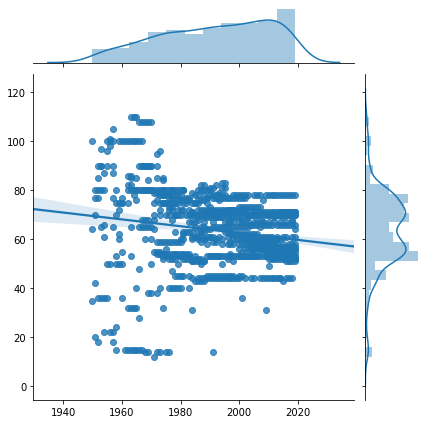

In [53]:
sns.jointplot(x=win_10.year.values.tolist(),y=win_10.Laps.values.tolist(),kind="reg")

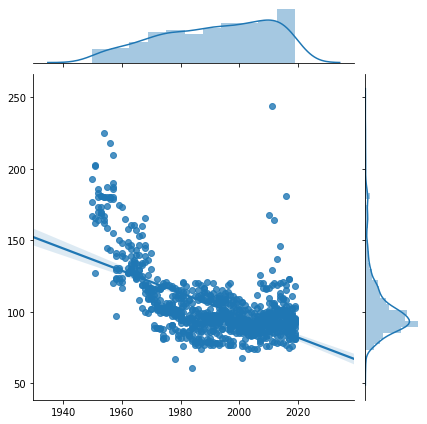

In [54]:
sns.jointplot(x=win_10.year.values.tolist(),y=win_10.TIME.values.tolist(),kind="reg")

In [55]:
# alt.Chart(win_10).mark_square().encode(
#     alt.X('year', scale=alt.Scale(zero=False)),
#     alt.Y('TIME', scale=alt.Scale(zero=False)),
#     alt.Facet('Track', columns=4),
# ).properties(
#     width=180,
#     height=180,
# )

In [56]:
alt.Chart(win_10,width=810,height=600,background="#DCDCDC").mark_rect().encode(
    x=alt.X('year:O'),
    y=alt.Y("Track"),
    color="average(TIME)",
    tooltip="TIME"
).interactive()

alt.Chart(...)

## Ferrari Vs Mclaren, Mercedes

In [57]:
car=win_10[["Car","Track","year"]]

In [58]:
fer=car[car["Car"]=="Ferrari"]

In [59]:
mcr=car[car["Car"]=="Mercedes"]

In [60]:
mcl=car[car["Car"]=="McLaren Mercedes"]

In [61]:
mcl

,Car,Track,year
496,McLaren Mercedes,Australia,1997
507,McLaren Mercedes,Italy,1997
511,McLaren Mercedes,Europe,1997
512,McLaren Mercedes,Australia,1998
513,McLaren Mercedes,Brazil,1998
...,...,...,...
752,McLaren Mercedes,Hungary,2012
753,McLaren Mercedes,Belgium,2012
754,McLaren Mercedes,Italy,2012
760,McLaren Mercedes,United States,2012


In [62]:
ren=car[car["Car"]=="Williams Renault"]

In [63]:
brush = alt.selection(type='interval')

points_fer = alt.Chart(fer,title="Ferrari").mark_point().encode(
    alt.X('year',type="nominal", scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]

    ).properties(
    width=500,
    height=400).add_selection(
    brush
).add_selection(
    brush
)
points_mcr = alt.Chart(mcr,title="Mercedes").mark_point().encode(
    alt.X('year:N', scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track:N', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]
    

    ).properties(
    width=400,
    height=400).add_selection(
    brush
).add_selection(
    brush
)

bar_year_fer = alt.Chart(fer).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=500,
)
bar_year_mcr = alt.Chart(mcr).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300,
)



bar_track_fer = alt.Chart(fer).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)
bar_track_mcr = alt.Chart(mcr).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)

points_mcl = alt.Chart(mcl,title="Mclaren Mercedes").mark_point().encode(
    alt.X('year',type="nominal", scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]

    ).properties(
    width=450,
    height=400).add_selection(
    brush
).add_selection(
    brush
)
points_ren = alt.Chart(ren,title="Renault").mark_point().encode(
    alt.X('year:N', scale=alt.Scale(zero=False),title="YEAR"),
    alt.Y('Track:N', scale=alt.Scale(zero=False),title="TRACK"),
    color=alt.condition(brush,"Track",alt.value("light")),
    tooltip=["Track","year"]
    

    ).properties(
    width=400,
    height=400).add_selection(
    brush
).add_selection(
    brush
)

bar_year_mcl = alt.Chart(mcl).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=450,
)
bar_year_ren = alt.Chart(ren).mark_bar().encode(
    x='year:N',
    y='count()'
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300,
)



bar_track_mcl = alt.Chart(mcl).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)
bar_track_ren = alt.Chart(ren).mark_bar().encode(
    x='count()',
    y='Track',
    color=alt.Color('Track'),
).transform_calculate(
    "track", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=300
)




alt.vconcat(points_fer,bar_year_fer,bar_track_fer,data=fer)|alt.vconcat(points_mcr,bar_year_mcr,bar_track_mcr,data=mcr)|alt.vconcat(points_mcl,bar_year_mcl,bar_track_mcl,data=mcl)|alt.vconcat(points_ren,bar_year_ren,bar_track_ren,data=ren)

alt.HConcatChart(...)

## Manufactures slope over the years

In [64]:
pr_10=df[df.groupby("Car")["Car"].transform("size")>380]

In [65]:
pr_10["Car"].value_counts()

Ferrari                 2179
Renault                  747
McLaren Mercedes         699
Lotus Ford               578
Tyrrell Ford             572
McLaren Ford             526
BRM                      506
Mercedes                 396
March Ford               391
Force India Mercedes     388
Maserati                 386
Name: Car, dtype: int64

In [66]:
win_10["Car"].value_counts()

Ferrari                      201
Mercedes                      93
McLaren Mercedes              77
Williams Renault              57
Lotus Ford                    44
McLaren Honda                 44
Red Bull Racing Renault       35
Renault                       30
McLaren Ford                  27
McLaren TAG                   24
Lotus Climax                  23
Williams Honda                20
Tyrrell Ford                  19
RBR Renault                   15
Brabham Ford                  14
Williams Ford                 14
Benetton Ford                 13
BRM                           12
Vanwall                       10
Benetton Renault              10
Cooper Climax                 10
Williams BMW                  10
Red Bull Racing TAG Heuer      9
Mercedes-Benz                  9
Matra Ford                     9
Maserati                       9
Brawn Mercedes                 8
Brabham Repco                  8
Brabham BMW                    8
Lotus Renault                  6
Alfa Romeo

### Ferrari Mclaren Mercdes and Renault best drivers 

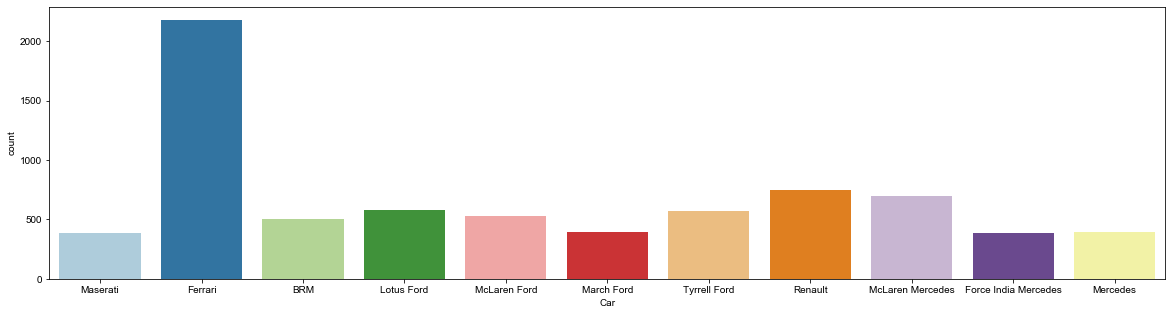

In [67]:
plt.figure(figsize=(20,5))
chart = sns.countplot(
    data=pr_10,palette="Paired",
    x=pr_10["Car"]

)
sns.set_style("dark", {"axes.facecolor": ".9"})

In [68]:
car_dri=df[["Car","Driver"]]

In [69]:
fer_dri=df[car_dri.groupby("Driver")["Driver"].transform("size")>15]

In [70]:
fer_dri_10=fer_dri[fer_dri["Car"]=="Ferrari"]

[Text(0, 0, 'Alberto Ascari'),
 Text(0, 0, 'Luigi  Villoresi'),
 Text(0, 0, 'Piero  Taruffi'),
 Text(0, 0, 'Jose Froilan Gonzalez'),
 Text(0, 0, 'Nino Farina'),
 Text(0, 0, 'Louis  Rosier'),
 Text(0, 0, 'Roy Salvadori'),
 Text(0, 0, 'Mike Hawthorn'),
 Text(0, 0, 'Maurice  Trintignant'),
 Text(0, 0, 'Robert  Manzon'),
 Text(0, 0, 'Harry Schell'),
 Text(0, 0, 'Eugenio Castellotti'),
 Text(0, 0, 'Johnny Claes'),
 Text(0, 0, 'Luigi Musso'),
 Text(0, 0, 'Juan Manuel Fangio'),
 Text(0, 0, 'Peter Collins'),
 Text(0, 0, 'Wolfgang von Trips'),
 Text(0, 0, 'Phil Hill'),
 Text(0, 0, 'Tony Brooks'),
 Text(0, 0, 'Jean Behra'),
 Text(0, 0, 'Cliff Allison'),
 Text(0, 0, 'Dan Gurney'),
 Text(0, 0, 'Richie Ginther'),
 Text(0, 0, 'Giancarlo Baghetti'),
 Text(0, 0, 'Lorenzo Bandini'),
 Text(0, 0, 'John Surtees'),
 Text(0, 0, 'Pedro Rodriguez'),
 Text(0, 0, 'Chris Amon'),
 Text(0, 0, 'Jacky Ickx'),
 Text(0, 0, 'Andrea de Adamich '),
 Text(0, 0, 'Clay Regazzoni'),
 Text(0, 0, 'Mario Andretti'),
 Text(0, 0,

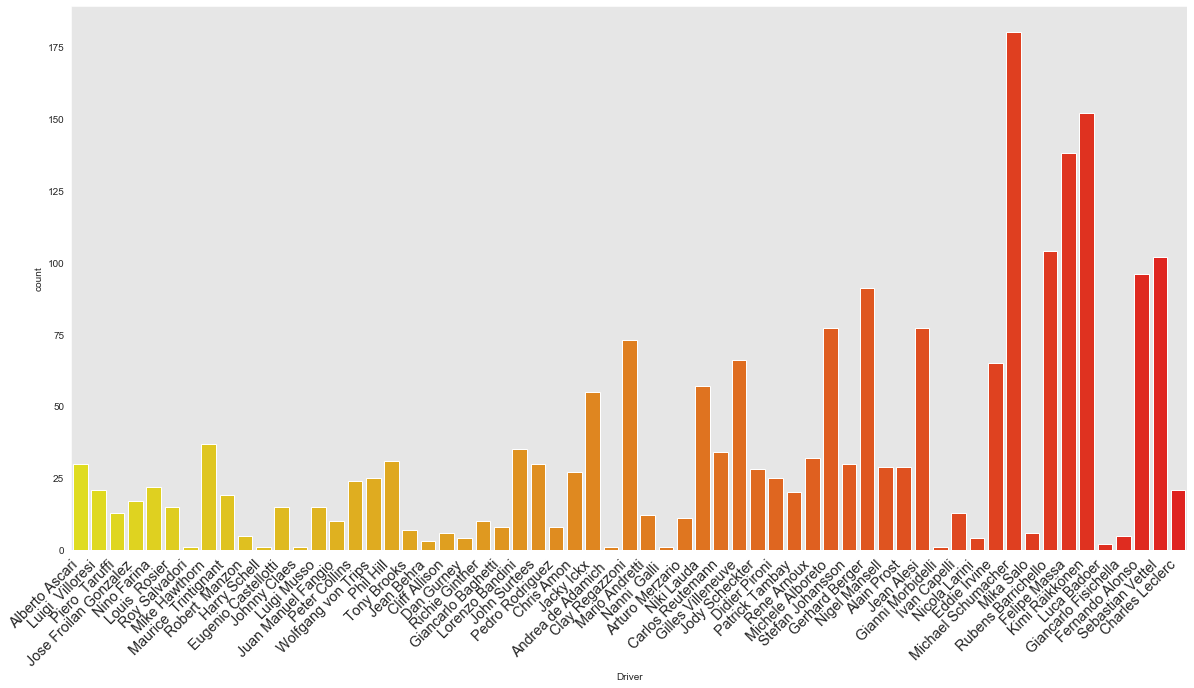

In [71]:
plt.figure(figsize=(20,10))
chart = sns.countplot(x=fer_dri_10["Driver"],palette="autumn_r")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')


In [72]:
mer_dris_10=fer_dri[fer_dri["Car"]=="Mercedes"]

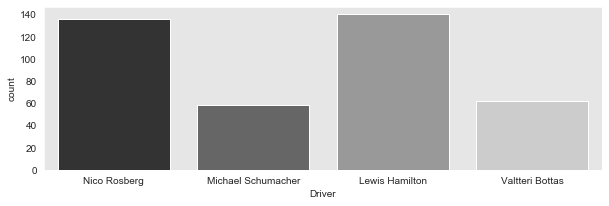

In [73]:
plt.figure(figsize=(10,3))
chart = sns.countplot(x=mer_dris_10["Driver"],palette="gist_yarg_r")
sns.set_style("dark", {"axes.facecolor": ".9"})

In [74]:
mcl_dris_10=fer_dri[fer_dri["Car"]=="McLaren Mercedes"]

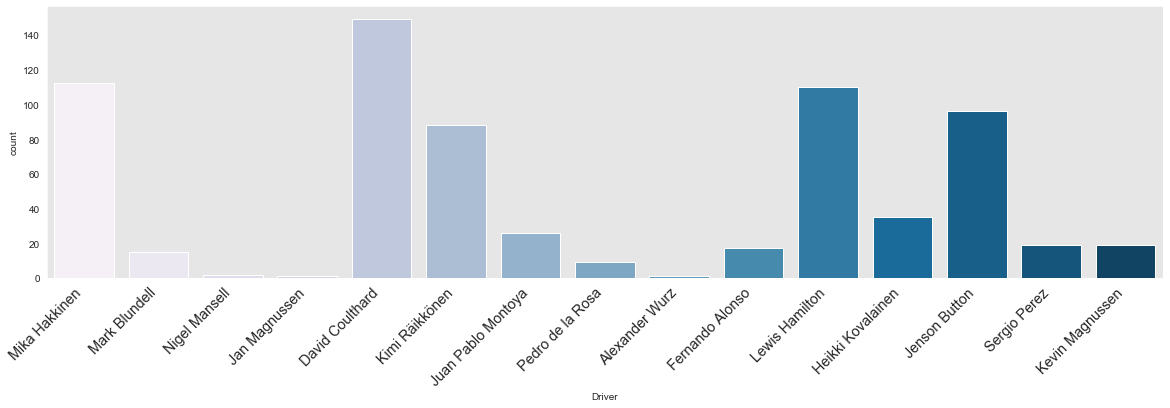

In [75]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x=mcl_dris_10["Driver"],palette="PuBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("dark", {"axes.facecolor": ".9"})

In [76]:
ren_dris_10=fer_dri[fer_dri["Car"]=="Renault"]

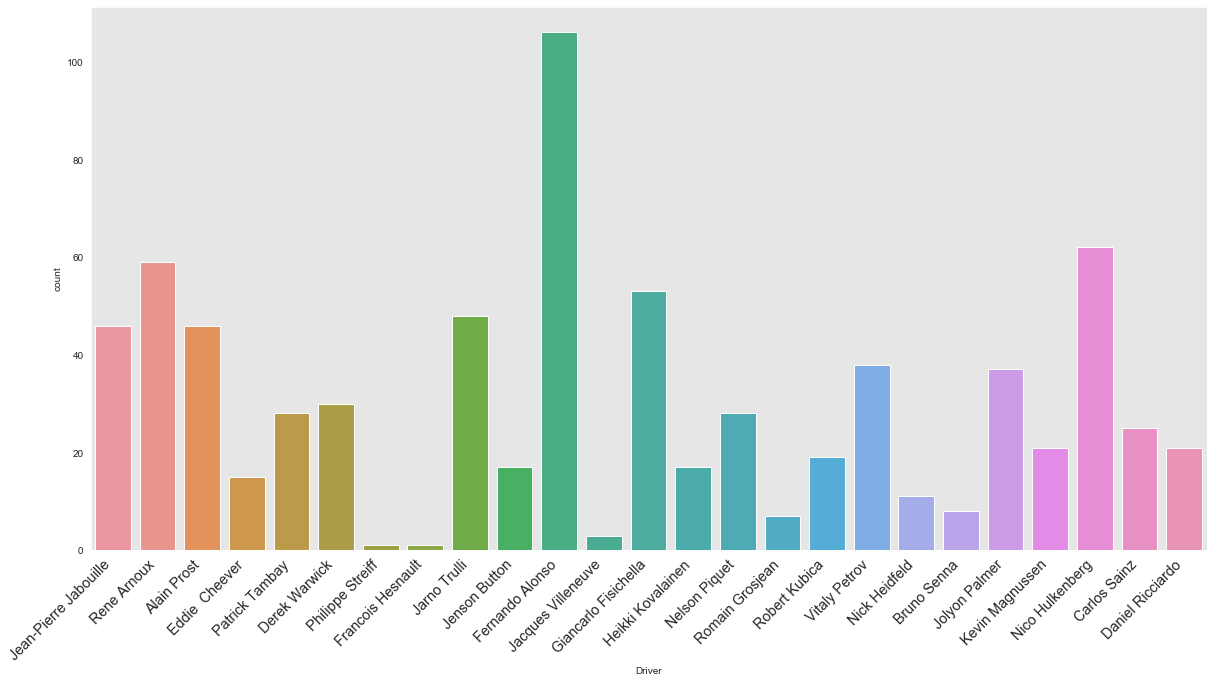

In [77]:
plt.figure(figsize=(20,10))
chart = sns.countplot(x=ren_dris_10["Driver"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')

sns.set_style("dark", {"axes.facecolor": ".9"})

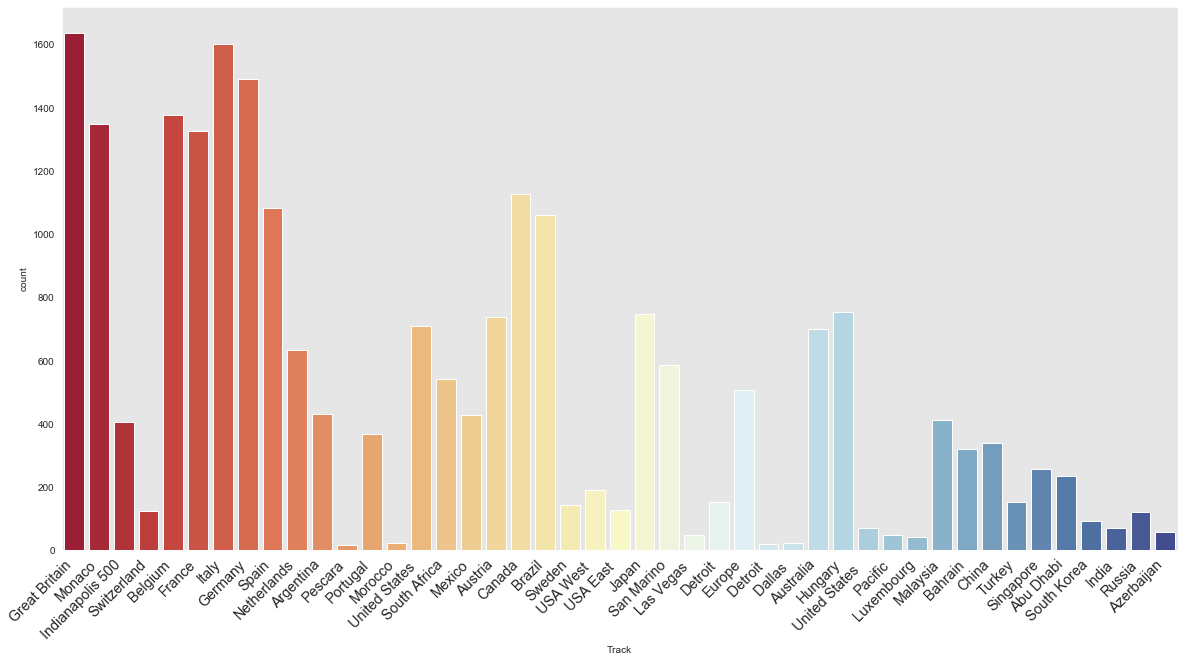

In [78]:
plt.figure(figsize=(20,10))
chart = sns.countplot(x=df["Track"],palette="RdYlBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("dark", {"axes.facecolor": ".9"})

## Average speed over the years

In [79]:
dfs_1=dfs[dfs["Position"]==1]

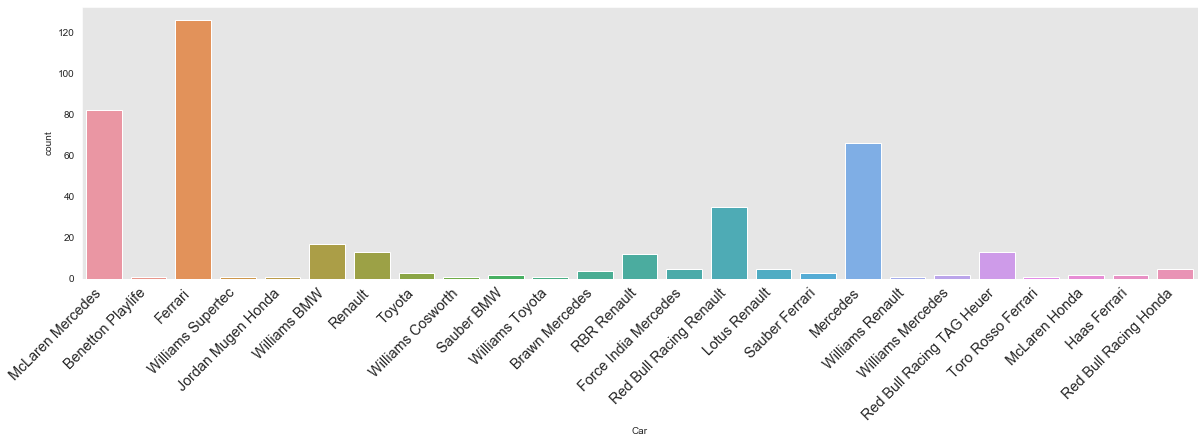

In [80]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x=dfs_1["Car"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("dark", {"axes.facecolor": ".9"})

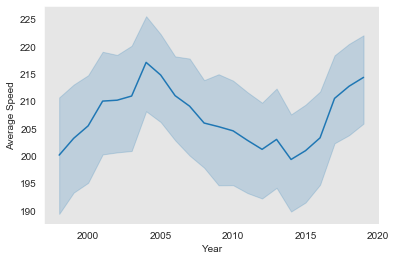

In [81]:
sns.lineplot(x=dfs_1["Year"],y=dfs_1["Average Speed"])

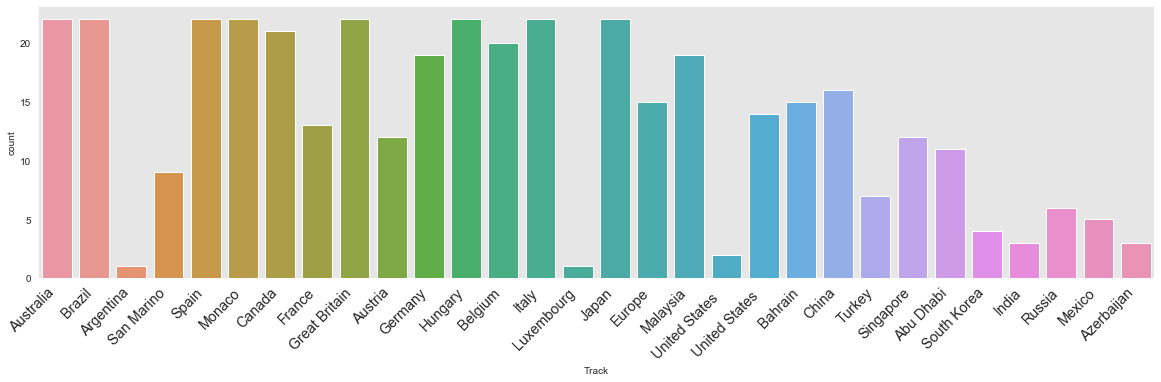

In [82]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x=dfs_1["Track"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("dark", {"axes.facecolor": ".9"})

In [83]:
dfs_10=dfs_1[dfs_1.groupby("Track")["Track"].transform("size")>10]

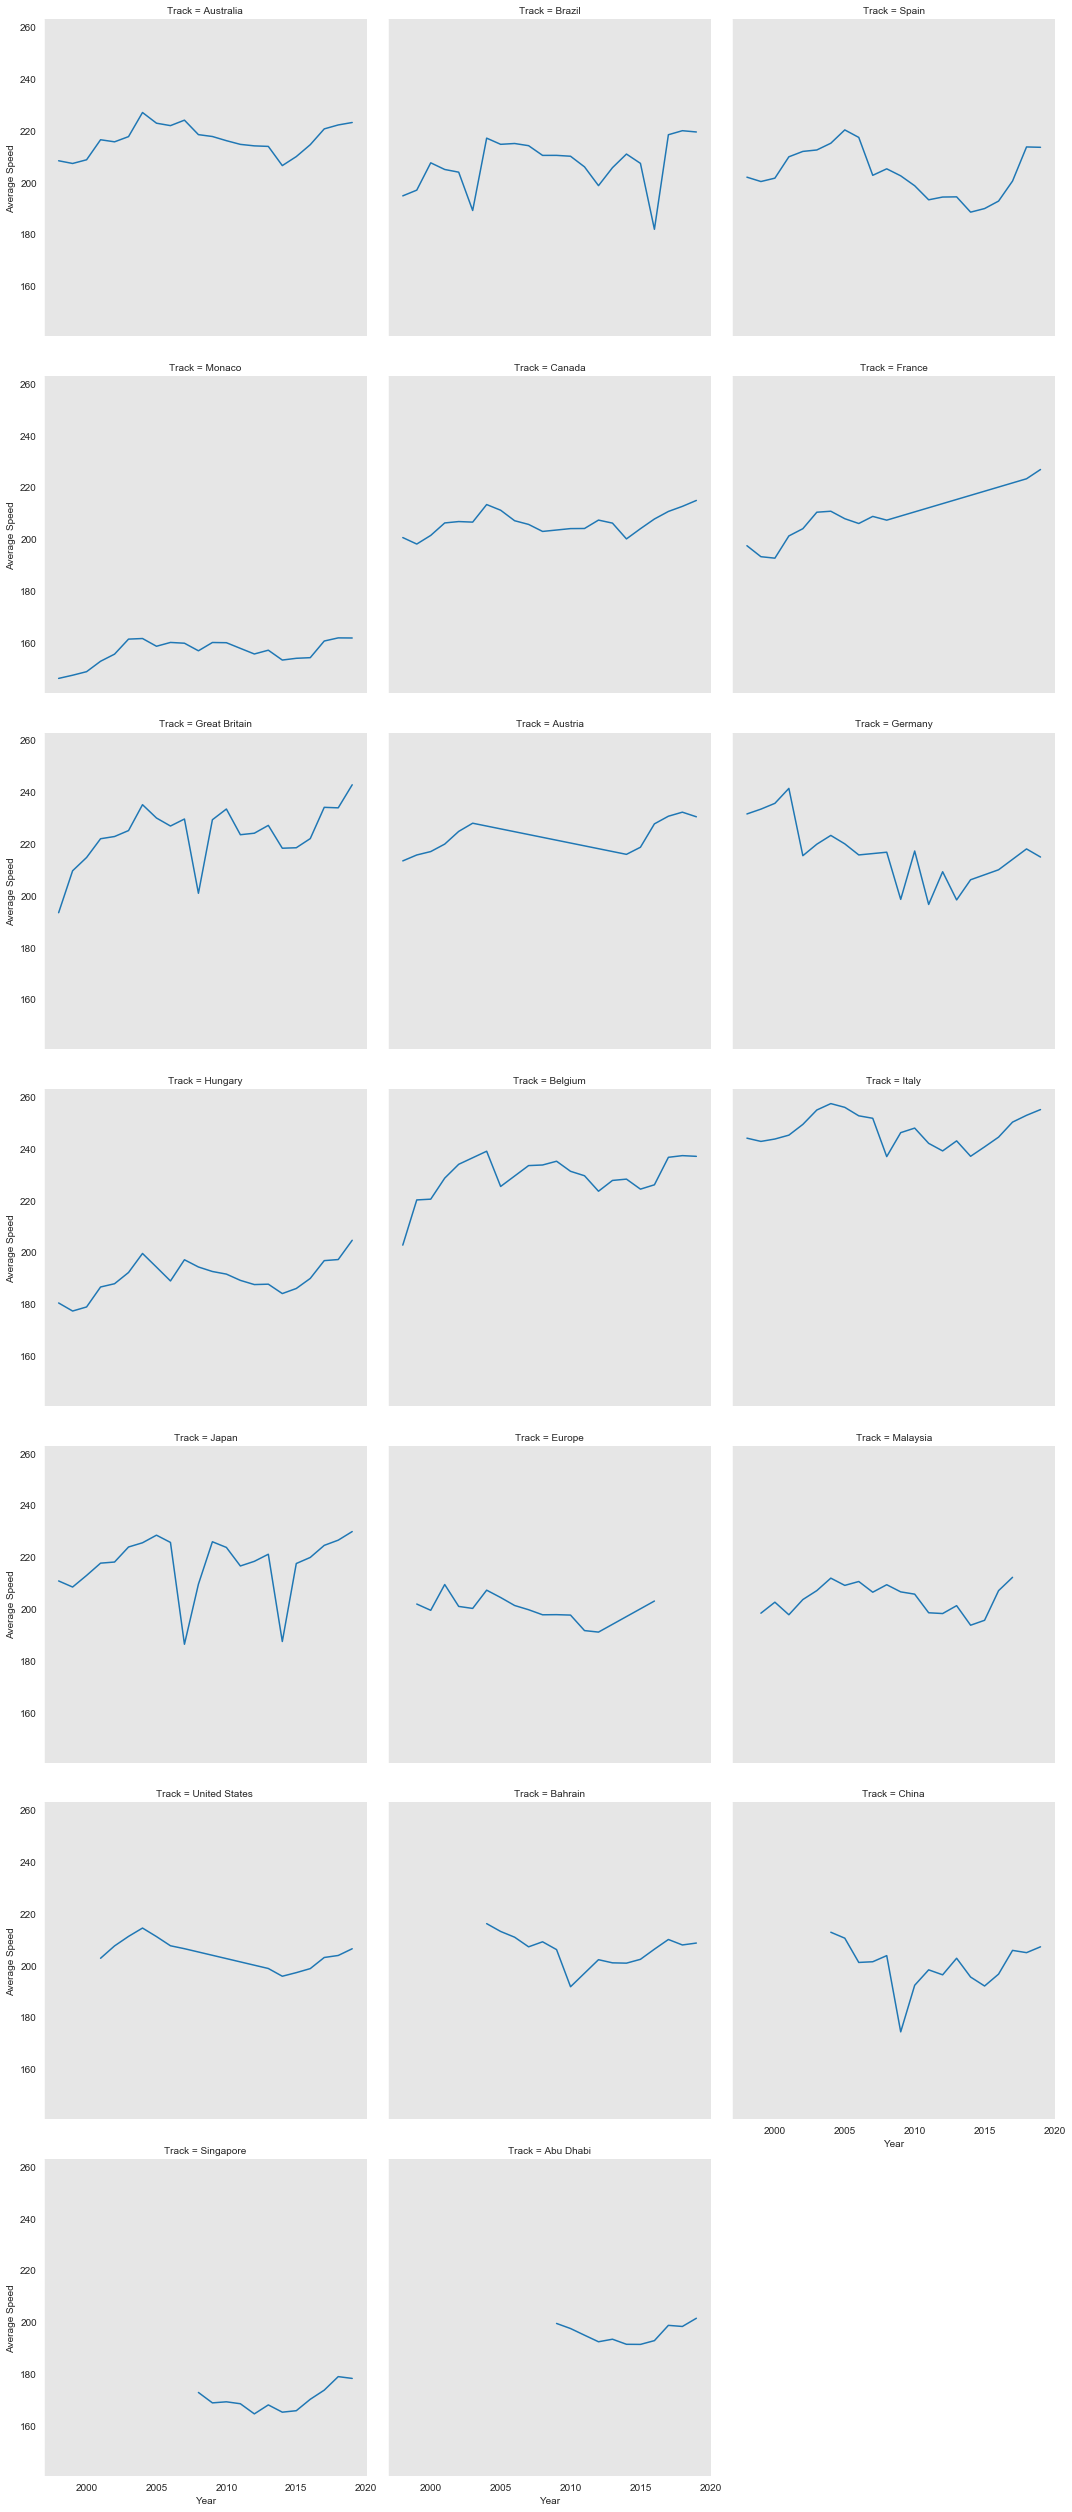

In [84]:
sns.relplot(x = "Year", y = "Average Speed",col = "Track", col_wrap = 3, data = dfs_10, 
             kind = "line")

## Qualifying vs Race time over the years

In [85]:
dfq["Driver"]= dfq["FirstName"] + " " +  dfq["LastName"]

In [86]:
dfq.drop(["LastName","FirstName"],axis=1)

,Position,Number,Car,Time,Track,year,Driver
0,1,2,Alfa Romeo,1:50.800,Great Britain,1950,Nino Farina
1,1,34,Alfa Romeo,1:50.200,Monaco,1950,Juan Manuel Fangio
2,1,98,Kurtis Kraft Offenhauser,1:06.992,Indianapolis 500,1950,Walt Faulkner
3,1,14,Alfa Romeo,2:42.100,Switzerland,1950,Juan Manuel Fangio
4,1,8,Alfa Romeo,4:37.000,Belgium,1950,Nino Farina
...,...,...,...,...,...,...,...
15590,16,8,Haas Ferrari,1:38.051,Abu Dhabi,2019,Romain Grosjean
15591,17,99,Alfa Romeo Racing Ferrari,1:38.114,Abu Dhabi,2019,Antonio Giovinazzi
15592,18,7,Alfa Romeo Racing Ferrari,1:38.383,Abu Dhabi,2019,Kimi Räikkönen
15593,19,63,Williams Mercedes,1:38.717,Abu Dhabi,2019,George Russell


In [87]:
dfq=dfq[["Position","Driver","Car","Time","Track","year"]]

In [88]:
dfq_1=dfq[dfq["Position"]=="1"]

In [89]:
dfq_10=dfq_1[dfq_1.groupby("Driver")["Driver"].transform("size")>3]

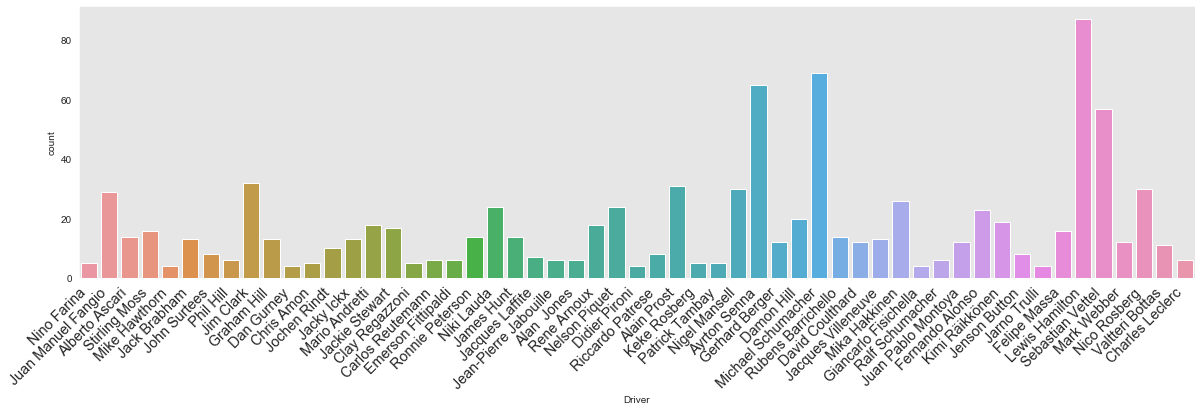

In [90]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x=dfq_10["Driver"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("dark", {"axes.facecolor": ".9"})

In [91]:
dfc_10=dfq_1[dfq_1.groupby("Car")["Car"].transform("size")>3]

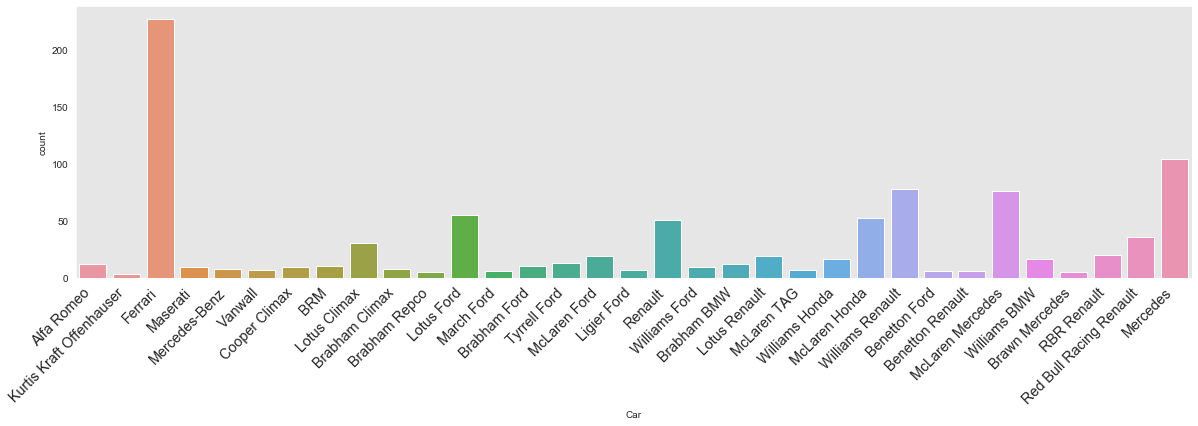

In [93]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x=dfc_10["Car"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',
    fontsize='x-large')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

## Races wins vs Participation
